In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# Import standard libraries
import os, sys
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import astropy.units as units

In [3]:
import chimera

/Users/lustija1/opt/anaconda3/lib/python3.8/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Users/lustija1/Documents/PandExo_data/pysynphot_data/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/Users/lustija1/opt/anaconda3/lib/python3.8/site-packages/pysynphot/refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /Users/lustija1/Documents/PandExo_data/pysynphot_data/mtab/*_tmg.fits
  warnings.warn('No graph or component tables found; '
/Users/lustija1/opt/anaconda3/lib/python3.8/site-packages/pysynphot/refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /Users/lustija1/Documents/PandExo_data/pysynphot_data/mtab/*_tmt.fits
  warnings.warn('No thermal tables found, '


In [15]:
import smarter; smarter.utils.plot_setup()

## CHIMERA currently has the `make_stellar()` function

In [4]:
print(chimera.make_stellar.__doc__)


    Make stellar using pysynphot

    Parameters
    ----------
    temp : float
        temperature
    logMH : float
        log stellar metallicity
    logg : float
        stellar logg
    database : str
        Stellar database to choose from
    outfile : str
        stellar h5 output file
    write_file : bool
        Set to create a stellar h5 file
    return_spectrum : bool
        Set to return the spectrum: `wave, fluxmks`

    Returns
    -------
    N/A just output file
    


In [5]:
import pysynphot as psyn

In [6]:
print(psyn.Icat.__doc__)

This class constructs a model from the grid available in
    :ref:`catalogs <pysynphot-spec-atlas>`.
    Specifically, they are :ref:`pysynphot-appendixa-ck04`,
    :ref:`pysynphot-appendixa-kurucz1993`, and
    :ref:`pysynphot-appendixa-phoenix`.

    Each grid contains a master file named "catalog.fits", as
    defined by ``pysynphot.locations.CAT_TEMPLATE``.
    The basis spectra are located at ``pysynphot.locations.KUR_TEMPLATE``.
    You may inspect the data files in CRDS to see how they
    are formatted.

    Parameters
    ----------
    catdir : {'ck04models', 'k93models', 'phoenix'}
        Name of directory holding the catalogs.

    Teff : float
        Effective temperature of model, in Kelvin.

    metallicity : float
        Metallicity of model.

    log_g : float
        Log surface gravity of model.

    Attributes
    ----------
    name : str
        Short description of the spectrum.

    parameter_names : list of str
        Names for model parameters. This is use

In [16]:
# File to be created
stellar_file = 'sum_star.h5'

# Set Parameters
temp = 5000    # Effective temperature of model, in Kelvin: Between 2,000,  70,000
logmh = 0     # Log Metallicity of mode: Between -4, 0.5
logg = 4.0     # Log surface gravity of model: Between 0.0, 5.5
stellar_db = 'phoenix'

# Call make stellar 
wl_star, f_star = chimera.make_stellar(temp, logmh, logg, stellar_db, stellar_file, write_file=False, return_spectrum=True)
wl_star = wl_star * 1e6

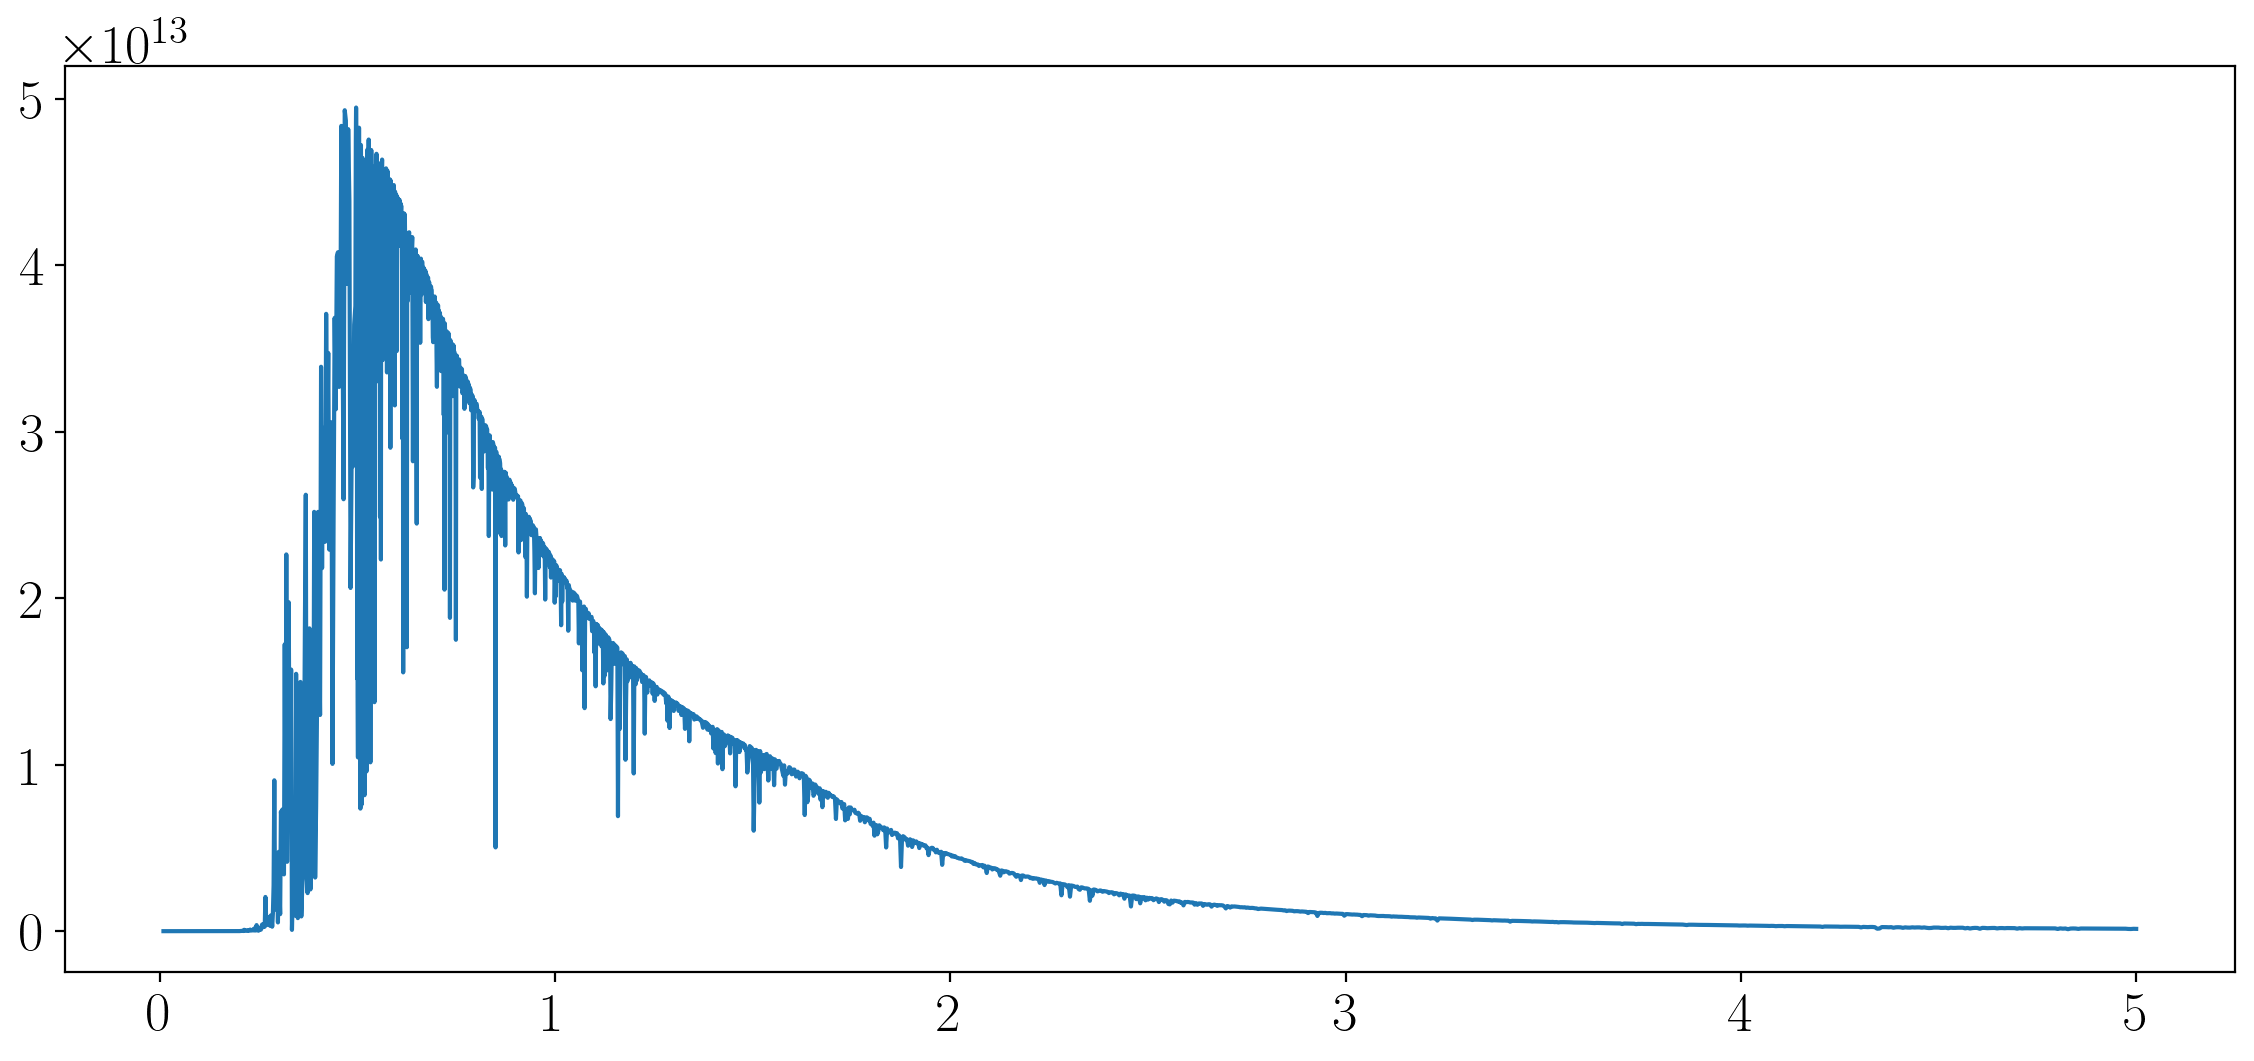

In [17]:
m = (wl_star > 0.01) & (wl_star < 5.0)

fig, ax = plt.subplots(figsize = (14, 6))
ax.plot(wl_star[m], f_star[m])

(0.001, 1e+21)

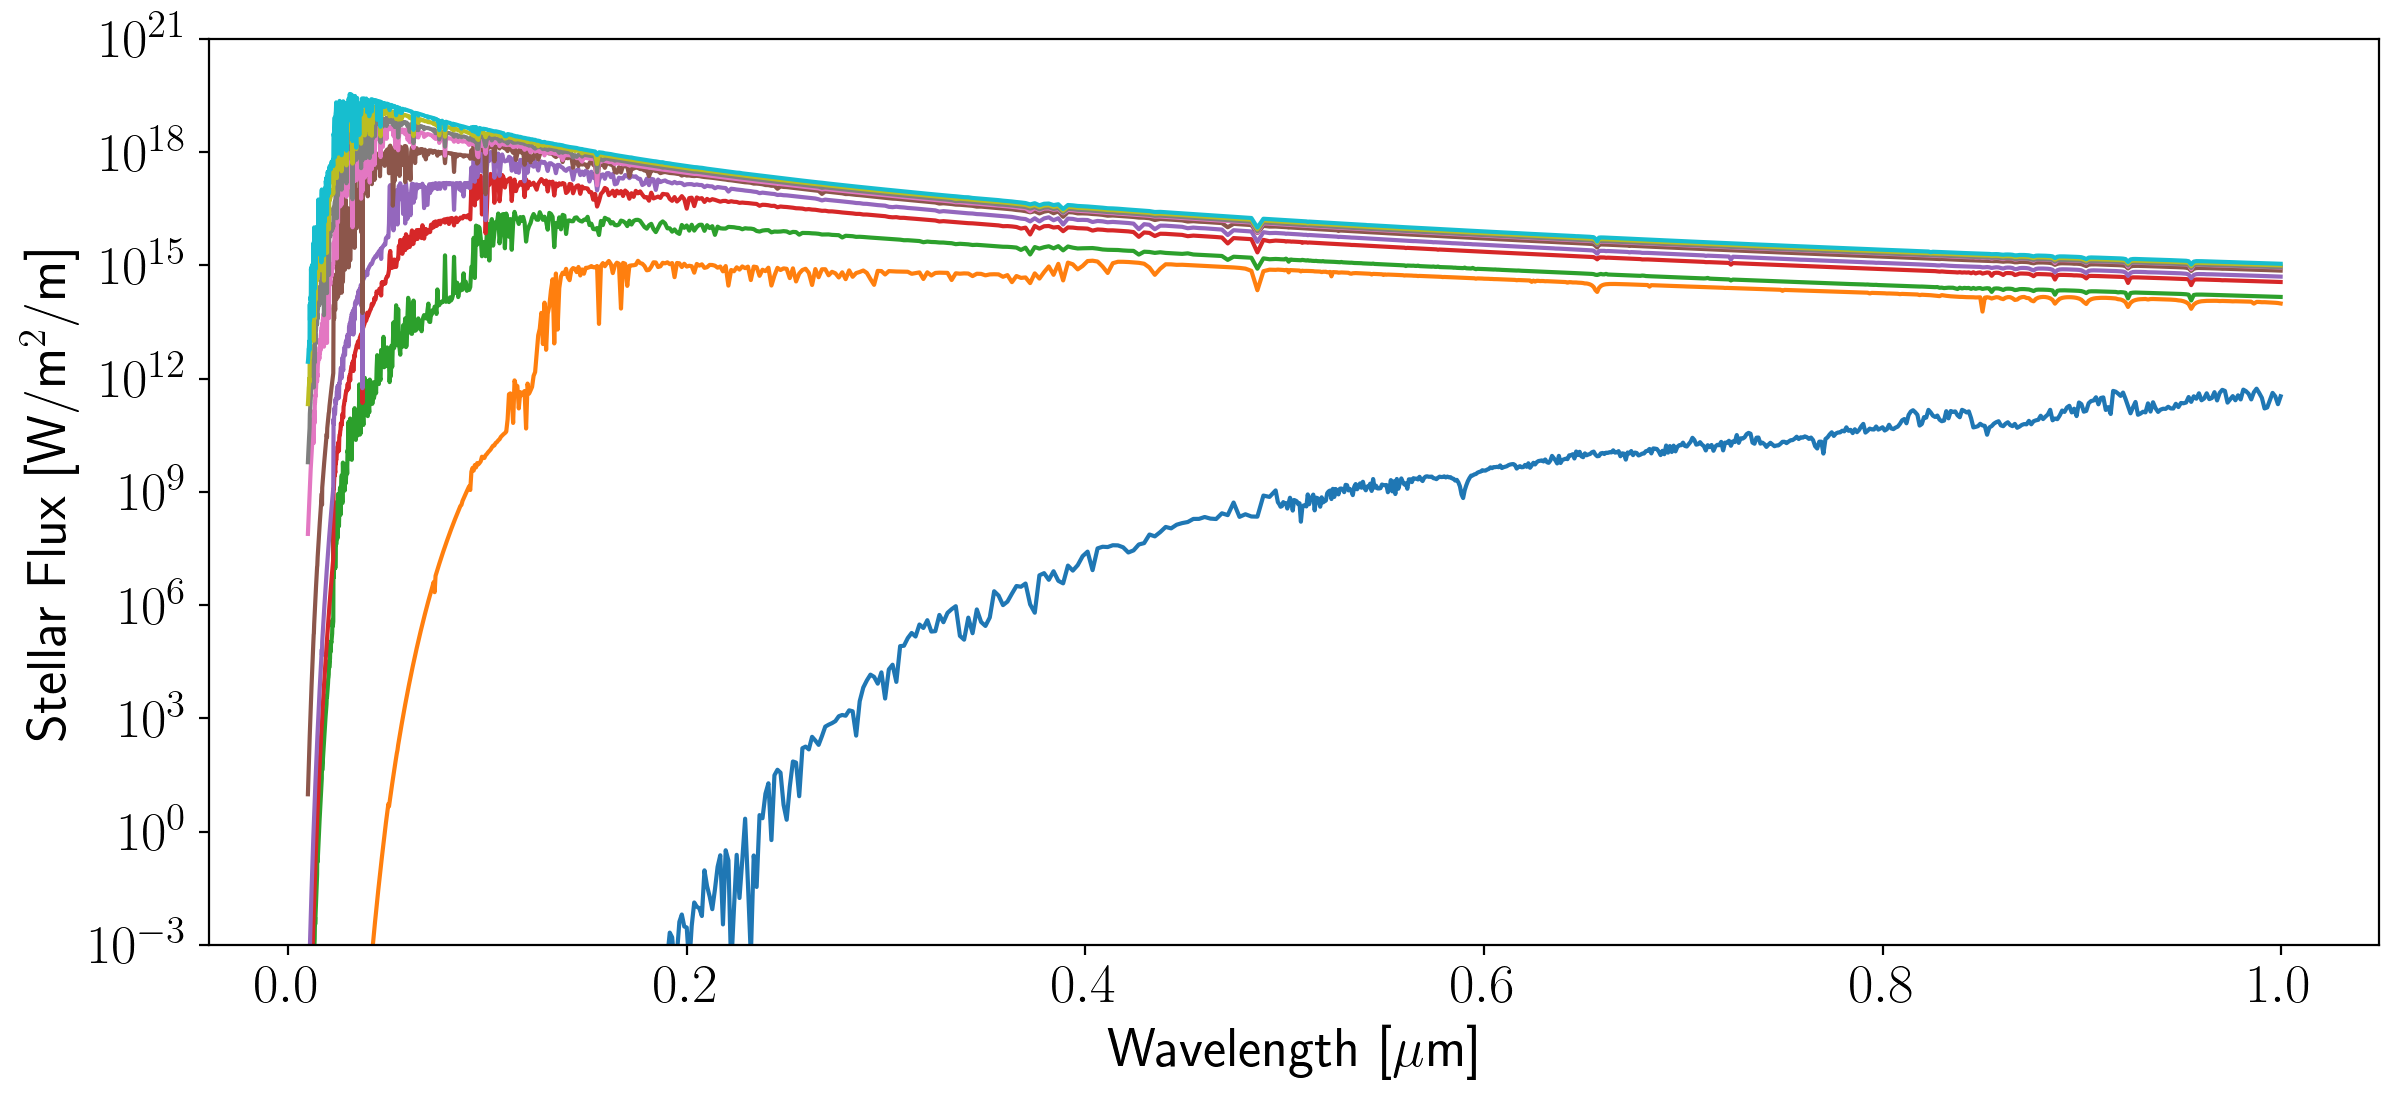

In [18]:
Ts = np.linspace(2000, 70000, 10)
logmhs = np.linspace(-4, 0.5, 10)
loggs = np.linspace(0.0, 5.5, 10) 

fig, ax = plt.subplots(figsize = (14, 6))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Stellar Flux [W/m$^2$/m]")

for i, T in enumerate(Ts):
    
    wl_star, f_star = chimera.make_stellar(T, logmh, logg, stellar_db, stellar_file, write_file=False, return_spectrum=True)
    
    wl_star = wl_star * 1e6
    m = (wl_star > 0.01) & (wl_star < 1.0)
    ax.plot(wl_star[m], f_star[m])
    
ax.set_yscale("log")
ax.set_ylim(bottom = 1e-3, top = 1e21)


In [10]:
%timeit chimera.make_stellar(temp, logmh, logg, stellar_db, stellar_file, write_file=True, return_spectrum=False)

70.4 ms ± 2.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
from chimera import make_stellar, make_stellar_multicomponent

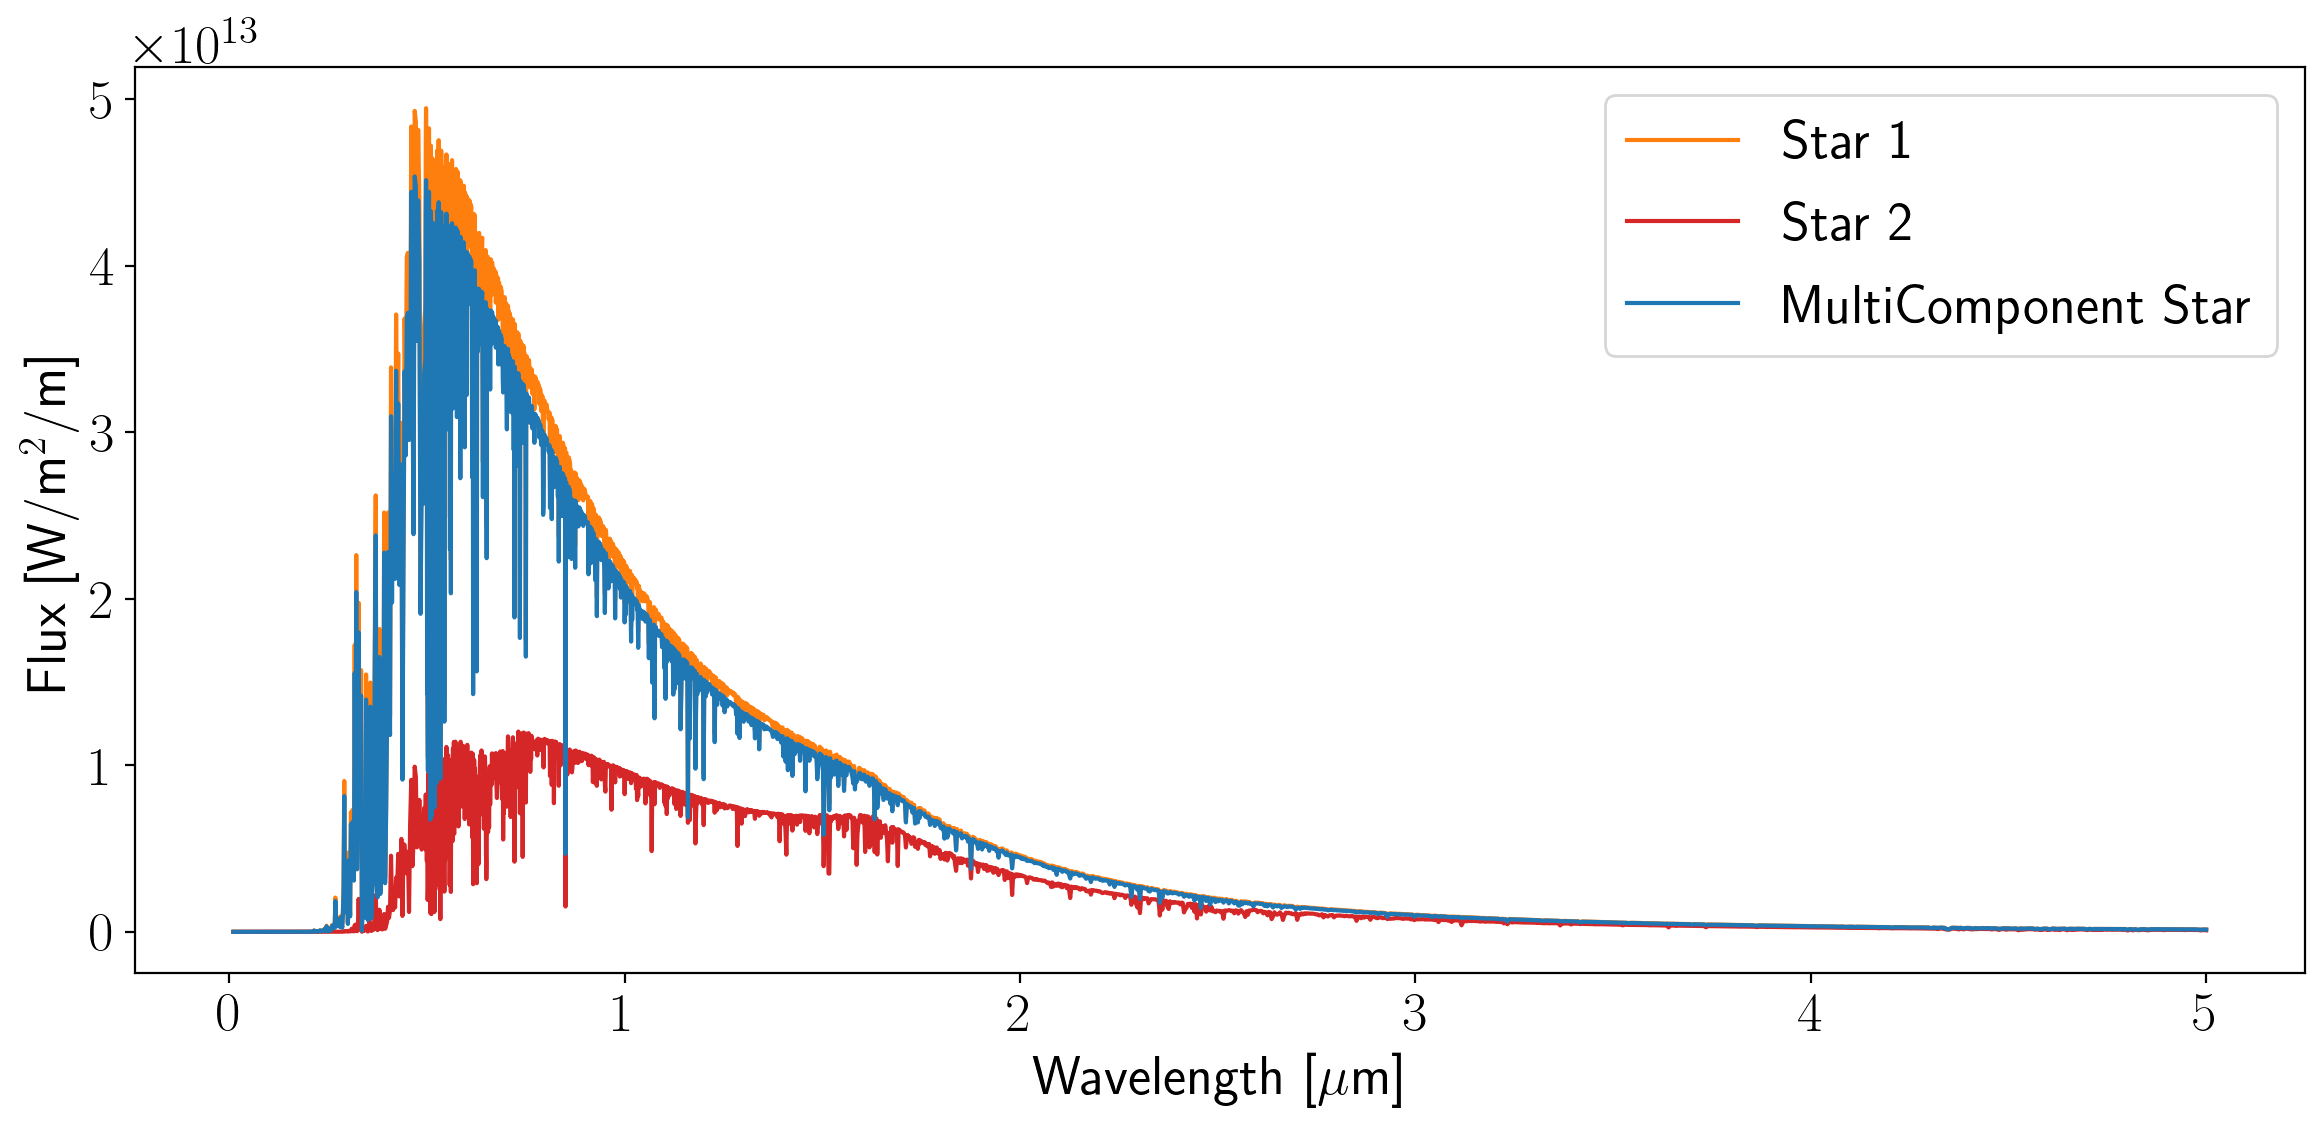

In [20]:
fig, ax = plt.subplots(figsize = (14, 6))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Flux [W/m$^2$/m]")

fracs = [0.9, 0.1] 
Ts = [5000, 4000] 
logmhs = [0.0, 0.0] 
loggs = [4.0, 4.0]

# Star 1
wl_star, f_star = make_stellar(Ts[0], logmhs[0], loggs[0], stellar_db, stellar_file, write_file=False, return_spectrum=True)
wl_star = wl_star * 1e6
m = (wl_star > 0.01) & (wl_star < 5.0)
ax.plot(wl_star[m], f_star[m], color = "C1", label = "Star 1")

# Star 2
wl_star, f_star = make_stellar(Ts[1], logmhs[1], loggs[1], stellar_db, stellar_file, write_file=False, return_spectrum=True)
wl_star = wl_star * 1e6
m = (wl_star > 0.01) & (wl_star < 5.0)
ax.plot(wl_star[m], f_star[m], label = "Star 2", color = "C3")

# Multi Star
wl_star, f_star = make_stellar_multicomponent(fracs, Ts, logmhs, loggs, 
                                       stellar_db, stellar_file, write_file=False, return_spectrum=True)
wl_star = 1e6 * wl_star
m = (wl_star > 0.01) & (wl_star < 5.0)
ax.plot(wl_star[m], f_star[m], label = "MultiComponent Star", color = "C0")

ax.legend()